In [11]:
import numpy as np
import pandas as pd
from scipy import sparse
import torch
from torch.utils.data import TensorDataset, Dataset

df = pd.read_csv('./data/seizure/seizure_train.csv')
df['y'] = df['y'] - 1
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,-104,-96,-96,-99,-82,-100,-98,-107,-97,-87,...,-83,-77,-88,-76,-86,-69,-77,-74,-73,4
1,-58,-16,56,119,134,133,97,74,42,-9,...,-126,-107,-82,-70,-50,-36,8,66,123,3
2,-287,-256,-222,-185,-178,-166,-165,-138,-120,-83,...,-407,-370,-346,-284,-231,-173,-135,-80,-39,0
3,4,14,24,33,10,-27,-40,-14,7,24,...,-38,2,23,21,-10,-75,-105,-89,-52,4
4,-17,-16,-14,5,6,6,-3,5,2,16,...,33,26,35,24,22,26,21,27,28,1
5,-143,-140,-132,-112,-115,-99,-102,-84,-104,-87,...,-47,-34,-30,-21,-17,8,19,32,37,2
6,-22,-9,-4,15,15,18,17,6,-1,-2,...,34,21,32,28,36,30,30,-4,-7,3
7,-20,-22,-29,-34,-38,-41,-46,-46,-43,-33,...,-76,-61,-37,-9,-9,-5,0,-1,1,1
8,-264,-184,-117,-48,29,64,114,141,165,188,...,-236,-218,-246,-313,-443,-524,-542,-539,-493,0
9,83,62,62,42,-12,-40,-53,-54,-19,15,...,-60,-44,-48,-8,-7,18,-4,-11,10,2


In [26]:
data = torch.from_numpy(df.drop(['y'], axis=1).to_numpy())
target = torch.from_numpy(df['y'].to_numpy())
print(data)
print(target)
TensorDataset(data, target)

tensor([[-104,  -96,  -96,  ...,  -77,  -74,  -73],
        [ -58,  -16,   56,  ...,    8,   66,  123],
        [-287, -256, -222,  ..., -135,  -80,  -39],
        ...,
        [ 177,  153,  151,  ...,   12,   44,   52],
        [  62,   88,   93,  ...,   37,   27,   44],
        [ -52,  -49,  -39,  ..., -131, -124,  -98]])
tensor([4, 3, 0,  ..., 2, 1, 4])


In [36]:
print(data.size())
print(target.shape)
print(data.unsqueeze(dim=1).size())
print(data.unsqueeze(dim=2).size())

torch.Size([8050, 178])
torch.Size([8050])
torch.Size([8050, 1, 178])
torch.Size([8050, 178, 1])


In [66]:
import torch.nn as nn
class MyMLP(nn.Module):
	def __init__(self):
		super(MyMLP, self).__init__()
		self.input_layer = nn.Linear(178, 16)
		self.hidden_layer = nn.Linear(16, 16)
		self.activation_function = nn.Sigmoid()
		self.output_layer = nn.Linear(16, 5)

	def forward(self, x):
		return self.output_layer(
			self.activation_function(
				self.hidden_layer(
					self.input_layer(x)
				)
			)
		)
    
x = torch.randn(100, 178)
model = MyMLP()
result_tensor = model(x)

print(x.size())
print(result_tensor.size())
result_tensor[0]

torch.Size([100, 178])
torch.Size([100, 5])


tensor([-0.9981,  0.1928,  0.2018, -0.2067, -0.3484], grad_fn=<SelectBackward>)

<module 'matplotlib.pyplot' from '/Users/aparagas/.pyenv/versions/anaconda3-4.3.0/envs/hw5/lib/python3.6/site-packages/matplotlib/pyplot.py'>

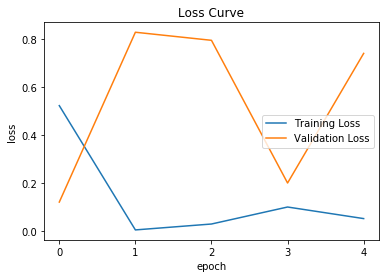

In [180]:
import matplotlib.pyplot as plt

training_loss = np.random.rand(5)
validation_loss = np.random.rand(5)

def plot_curves(data_1, label_1, data_2, label_2, title=None, file_name=None):
	plt.title(title)
	plt.plot(data_1, label=label_1)
	plt.plot(data_2, label=label_2)
	plt.xlabel('epoch')
	plt.ylabel('loss')
	plt.xticks(np.arange(0, len(training_loss), step=1))
	plt.legend()

	if isinstance(file_name, str):
		code_folder = path.dirname(path.realpath(__file__))
		path.normpath(path.join(code_folder, "../", file_name))
		plt.savefig(file_name)
		
	return plt
	
plot_curves(
	training_loss, "Training Loss", 
	validation_loss, "Validation Loss",
	"Loss Curve"
)

In [96]:
from os import path
code_folder = path.dirname(path.realpath("__file__"))
path.normpath(path.join(code_folder, "../", "loss_curve.png"))

'/Users/aparagas/Development/CSE6250/loss_curve.png'

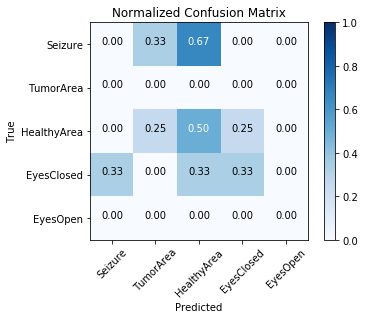

In [260]:
import itertools
from sklearn.metrics import confusion_matrix

class_names = ['Seizure', 'TumorArea', 'HealthyArea', 'EyesClosed', 'EyesOpen']
results = list(zip(
    np.random.randint(0, 4, size=10), 
    np.random.randint(0, 4, size=10)
))

y_true = list(map(lambda tuplet: tuplet[0], results))
y_pred = list(map(lambda tuplet: tuplet[1], results))
cmatrix = confusion_matrix(y_true, y_pred, labels=np.arange(5))

true_row_sums =  cmatrix.sum(axis=1)
true_row_sums[true_row_sums < 1] = 1
cmatrix_probs = cmatrix.astype('float') / true_row_sums[:, np.newaxis]

figure, ax = plt.subplots()
image = ax.imshow(
		cmatrix_probs, interpolation='nearest', cmap=plt.get_cmap('Blues'), 
		vmin=0.0, vmax=1.0
	)
ax.set_title('Normalized Confusion Matrix')
ax.set_xticks(np.arange(len(class_names)))
ax.set_xticklabels(
    class_names,
    rotation=45
)
ax.set_xlabel('Predicted')
ax.set_yticks(np.arange(len(class_names)))
ax.set_yticklabels(
    class_names
)
ax.set_ylabel('True')

colorbar_ticks = np.linspace(0.0, 1.0, num=6)
colorbar = figure.colorbar(image)
colorbar.set_ticks(colorbar_ticks)

for i, j in itertools.product(
    range(cmatrix_probs.shape[0]),
    range(cmatrix_probs.shape[1])
):
    ax.text(
        j, i, '{:0.2f}'.format(cmatrix_probs[i, j]),
        horizontalalignment='center', 
        color='white' if cmatrix_probs[i, j] > 0.4 else 'black'
    )
ax

In [236]:
true_row_sums =  cmatrix.sum(axis=1)
true_row_sums[true_row_sums < 1] = 1
cmatrix_probs = cmatrix.astype('float') / true_row_sums[:, np.newaxis]
print(cmatrix)
cmatrix_probs

[[1 0 1 0 0]
 [0 0 0 1 0]
 [3 0 1 0 0]
 [1 1 0 1 0]
 [0 0 0 0 0]]


array([[0.5       , 0.        , 0.5       , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.75      , 0.        , 0.25      , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [237]:
print(y_true)
print(y_pred)

[2, 1, 0, 2, 3, 3, 0, 2, 3, 2]
[0, 3, 2, 0, 3, 0, 0, 0, 1, 2]


In [238]:
np.linspace(0.0, 1.0, num=6)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [272]:
seizure_data_matrix = data
seizure_data_cube = data.unsqueeze(dim=1)

print(seizure_data_matrix[0].size())
print(seizure_data_matrix[0])
print("\n")
print(seizure_data_cube[0].size())
print(seizure_data_cube[0][0])

torch.Size([178])
tensor([-104,  -96,  -96,  -99,  -82, -100,  -98, -107,  -97,  -87,  -67,  -75,
         -77,  -80,  -76,  -80,  -76,  -54,  -52,  -51,  -59,  -75,  -90,  -91,
         -98,  -84,  -74,  -81,  -69,  -76,  -70,  -69,  -82,  -77,  -77,  -68,
         -67,  -70,  -68,  -78,  -66,  -64,  -67,  -59,  -62,  -76,  -83,  -76,
         -85,  -82,  -65,  -68,  -87,  -94,  -87,  -96,  -80,  -96,  -89,  -79,
         -58,  -39,  -38,  -38,  -45,  -64,  -64,  -61,  -72,  -74,  -61,  -60,
         -64,  -59,  -49,  -39,  -36,  -26,  -43,  -52,  -63,  -57,  -74,  -73,
         -72,  -53,  -65,  -46,  -47,  -63,  -51,  -71,  -54,  -63,  -52,  -54,
         -69,  -65,  -61,  -63,  -60,  -70,  -61,  -82,  -84,  -92,  -91,  -85,
         -74,  -78,  -54,  -53,  -60,  -65,  -70,  -61,  -47,  -55,  -69,  -71,
         -64,  -81,  -82,  -82, -100,  -89,  -81,  -82,  -75,  -69,  -63,  -79,
         -97,  -94,  -98,  -72,  -50,  -60,  -57,  -66,  -74,  -73,  -76,  -56,
         -56,  -53,  -

In [286]:
seizure_data_cube_2 = data.unsqueeze(dim=2)
print(seizure_data_cube.size())
print(seizure_data_cube_2.size())

torch.Size([8050, 1, 178])
torch.Size([8050, 178, 1])
